In [7]:
from sentence_transformers import CrossEncoder

In [8]:
#Distilled LLMs the decisions of which we try to explain
model1 = CrossEncoder('cross-encoder/ms-marco-TinyBERT-L-2', max_length=512)
model2 = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2', max_length=512)
model3 = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-12-v2', max_length=512)
model4 = CrossEncoder('cross-encoder/ms-marco-electra-base', max_length=512)

2023-12-06 05:04:54,940 | INFO : Use pytorch device: cuda
2023-12-06 05:04:55,187 | INFO : Use pytorch device: cuda
2023-12-06 05:04:55,495 | INFO : Use pytorch device: cuda
2023-12-06 05:04:56,338 | INFO : Use pytorch device: cuda


In [9]:
#A Query and a set of 8 relevant passages from the MS MARCO passage reranking dataset
query = "definition of gross salary verus basic salary"

par1 = "Basic Definition. Gross salary is the term used to describe all of the money youâve made while working at your job, figured before any deductions are taken for state and federal taxes, Social Security and health insurance."
par2 = "Gross pay is the total amount you earn. For example, if you earn $15 per hour and work eight hours a day, your gross pay for that day is 8 x $15, or $120. Net pay is the amount you actually receive after any preliminary taxes are removed, such as Social Security, federal taxes and money toward workers' compensation."
par3 = "Gross salary is the term used to describe all of the money youâve made while working at your job, figured before any deductions are taken for state and federal taxes, Social Security and health insurance."
par4 = "You may receive a monthly or daily salary. Daily wages are calculated using either the gross rate (for paid public holidays, paid leave, salary in lieu and salary deductions) or the basic rate (for work on rest days or public holidays)."
par5 = "Gross vs. Net. Gross pay is the total amount you earn. For example, if you earn $15 per hour and work eight hours a day, your gross pay for that day is 8 x $15, or $120."
par6 = "Basic salary is the fixed salary, invariable, minimum wages, mandatory pay, fixed by the company to pay the employees. As per the legislative fixation, 30% to 60% of your salary shall be your basic pay, i.e., not less than 30% of your gross pay or take home salary ans not more than 60%, shall be basic pay."
par7 = "The company salary policy is basic 40% of gross, hra 24% of gross, ca 18% of gross & ma 18% of gross. company calculating pf deduction on basic (40% of gross), but for bonus calculation compny consider basic wages is (basic+ca+ma)."
par8 = "Gross pay is the total amount you earn. For example, if you earn $15 per hour and work eight hours a day, your gross pay for that day is 8 x $15, or $120."

In [10]:
#Predicting each passage's relevance to the query based on different LLMs 
scores1 = model1.predict([(query, par1), (query, par2) , (query, par3), (query,par4),(query, par5), (query, par6) , (query, par7), (query,par8)])
scores2 = model2.predict([(query, par1), (query, par2) , (query, par3), (query,par4),(query, par5), (query, par6) , (query, par7), (query,par8)])
scores3 = model3.predict([(query, par1), (query, par2) , (query, par3), (query,par4),(query, par5), (query, par6) , (query, par7), (query,par8)])
scores4 = model4.predict([(query, par1), (query, par2) , (query, par3), (query,par4),(query, par5), (query, par6) , (query, par7), (query,par8)])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
#Function to generate the document order from the output of various ranking models 
def order_func(s):
    return sorted(range(len(s)), key=lambda k: -s[k])

ord1,ord2,ord3,ord4 = order_func(scores1),order_func(scores2),order_func(scores3),order_func(scores4)
print(ord1)

[0, 2, 6, 5, 1, 7, 4, 3]


In [12]:
from lime.lime_text import LimeTextExplainer
import logging
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)


class_names = ['irrelevant','relevant']
explainer = LimeTextExplainer(class_names=class_names)
import numpy as np

pars = [par1.lower(),par2.lower(),par3.lower(),par4.lower(),par5.lower(),par6.lower(),par7.lower(),par8.lower()]

e = explainer.explain_instance(pars, model1, query, num_features=8 )
print(e)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2023-12-06 05:04:58,926 | INFO : [[1. 1. 1. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 0.]]
2023-12-06 05:04:58,927 | INFO : [[0 2 6 5 1 7 4 3]
 [0 4 7 1 5 3 2 6]
 [0 5 7 1 6 4 3 2]
 [1 7 4 3 5 6 0 2]
 [1 7 4 5 0 6 2 3]
 [0 2 6 5 1 7 4 3]
 [0 5 2 6 1 7 4 3]
 [0 5 2 6 1 7 3 4]
 [0 1 2 7 4 6 5 3]
 [3 5 1 7 6 4 0 2]
 [7 1 4 3 6 5 0 2]
 [0 5 6 1 7 3 4 2]
 [7 1 4 3 2 0 5 6]
 [1 4 7 3 0 2 6 5]
 [1 7 4 3 5 0 6 2]
 [3 4 1 7 2 0 6 5]
 [0 2 4 7 1 6 5 3]
 [7 1 4 0 5 2 3 6]
 [0 2 6 5 1 7 3 4]
 [3 6 1 7 4 5 0 2]
 [0 2 6 5 1 3 7 4]
 [1 7 4 3 0 2 6 5]
 [1 4 7 5 0 6 2 3]
 [0 2 6 7 1 5 4 3]
 [4 1 7 3 2 0 6 5]
 [3 0 5 1 7 4 6 2]
 [2 0 7 1 4 5 3 6]
 [1 7 4 3 5 0 2 6]
 [0 2 1 7 4 6 3 5]
 [0 3 6 2 1 5 7 4]
 [0 6 5 3 2 1 7 4]
 [0 2 6 5 1 7 4 3]
 [0 6 4 3 1 7 2 5]
 [1 4 7 2 0 6 5 3]
 [0 2 7 1 4 6 3 5]
 [0 2 6 5 1 7 4 3]
 [0 5 2 6 1 7 3 4]
 [3 5 7 1 4 0 6 2]
 [7 3 4 1 5 6 0 2]
 [0 5 3 6 1 4 7 2]
 [4 7 1 3 2 0 5 6]

TypeError: 'numpy.float64' object is not iterable

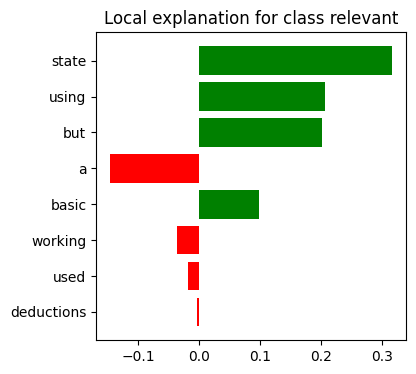

In [14]:
fig = e.as_pyplot_figure()